In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/songs_normalize.csv")

In [ ]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [ ]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
df["duration_ms"]=df["duration_ms"].round()

In [ ]:
df.rename(columns={"duration_ms":"duration_min"},inplace=True)

# Unique artist


In [ ]:
df["artist"].unique()

array(['Britney Spears', 'blink-182', 'Faith Hill', 'Bon Jovi', '*NSYNC',
       'Sisqo', 'Eminem', 'Robbie Williams', "Destiny's Child", 'Modjo',
       "Gigi D'Agostino", 'Eiffel 65', "Bomfunk MC's", 'Sting',
       'Melanie C', 'Aaliyah', 'Anastacia', 'Alice Deejay', 'Dr. Dre',
       'Linkin Park', 'Tom Jones', 'Sonique', 'M.O.P.', 'Limp Bizkit',
       'Darude', 'Da Brat', 'Moloko', 'Chicane', 'DMX', 'Debelah Morgan',
       'Madonna', 'Ruff Endz', 'Montell Jordan', 'Kylie Minogue', 'JAY-Z',
       'LeAnn Rimes', 'Avant', 'Enrique Iglesias', 'Toni Braxton',
       'Bow Wow', 'Missy Elliott', 'Backstreet Boys', 'Samantha Mumba',
       'Mýa', 'Mary Mary', 'Next', 'Janet Jackson', 'Ricky Martin',
       'Jagged Edge', 'Mariah Carey', 'Baha Men', 'Donell Jones', 'Oasis',
       'DJ Ötzi', 'P!nk', 'Craig David', 'Christina Aguilera',
       'Red Hot Chili Peppers', 'Sammie', 'Santana', 'Kandi', 'Vengaboys',
       'Ronan Keating', 'Madison Avenue', 'Céline Dion', '3 Doors Down',
     

# Total number of song increased by years


In [ ]:

tot_songs_year=tot_songs_year.sort_values(by="song",ascending=False)

In [ ]:
tot_songs_year

,year,song
0,1998,1
1,1999,38
2,2000,74
3,2001,108
4,2002,90
5,2003,97
6,2004,96
7,2005,104
8,2006,95
9,2007,94


Text(0.5, 1.0, 'No of SONGS RELEASED FROM 1998-2020')

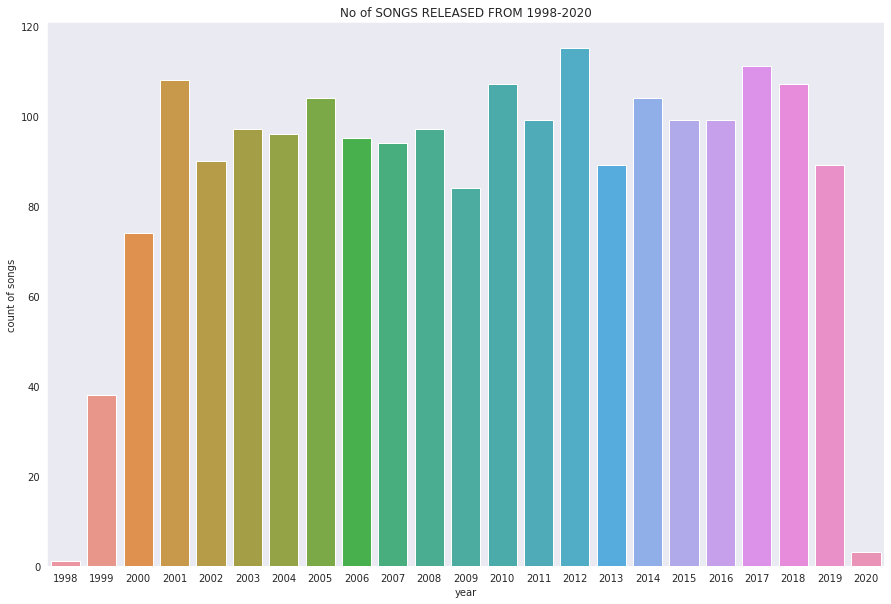

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(15,10))

sns.barplot(x="year",y="song",data=tot_songs_year)
plt.ylabel("count of songs")
plt.title("No of SONGS RELEASED FROM 1998-2020")



In [ ]:
df.columns

Index(['artist', 'song', 'duration_min', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [ ]:
tot_songs_year=df.groupby("year")["song"].count().reset_index()

# TOP 5 artist Based ON count 


In [ ]:
pop_artist=df.groupby("artist")["song"].count()

In [ ]:
pop_artist.reset_index()

,artist,song
0,*NSYNC,4
1,112,2
2,2 Chainz,2
3,21 Savage,2
4,2Pac,2
...,...,...
830,girl in red,1
831,iann dior,2
832,iio,1
833,t.A.T.u.,1


In [ ]:
pop_artist

artist
*NSYNC         4
112            2
2 Chainz       2
21 Savage      2
2Pac           2
              ..
girl in red    1
iann dior      2
iio            1
t.A.T.u.       1
will.i.am      4
Name: song, Length: 835, dtype: int64

In [ ]:
pop_artist=pop_artist.sort_values(ascending=False)

pop_artist=pop_artist.reset_index().head(5)

Text(0.5, 1.0, 'TOP 5 ARTIST')

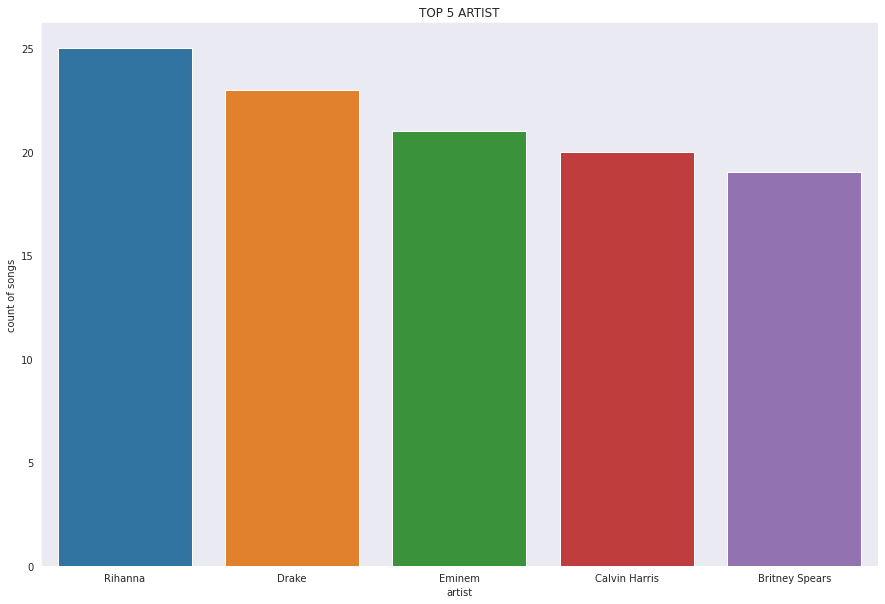

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(15,10))

sns.barplot(x="artist",y="song",data=pop_artist)
plt.ylabel("count of songs")
plt.title("TOP 5 ARTIST")


# CHECK CORRELATION  BETWEEN POPULARITY AND DANCEABILITY

In [ ]:
df.columns

Index(['artist', 'song', 'duration_min', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [ ]:
cor_pop_dan=df[["popularity","danceability"]]

In [ ]:
cor_pop_dan

,popularity,danceability
0,77,0.751
1,79,0.434
2,66,0.529
3,78,0.551
4,65,0.614
...,...,...
1995,79,0.842
1996,78,0.552
1997,69,0.847
1998,75,0.741


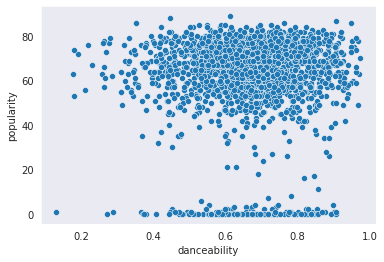

In [ ]:
sns.scatterplot(x="danceability",y="popularity",data=cor_pop_dan)

In [ ]:
cor_pop_dan.corr()

,popularity,danceability
popularity,1.000000,-0.003546
danceability,-0.003546,1.000000


# NO RELATION 

# DISTRIBUTION OF DATA

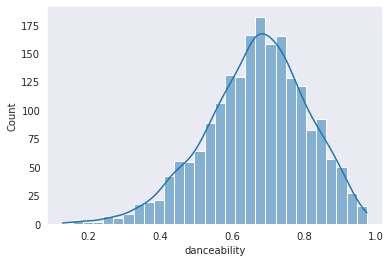

In [ ]:
sns.histplot(df["danceability"],kde=True)

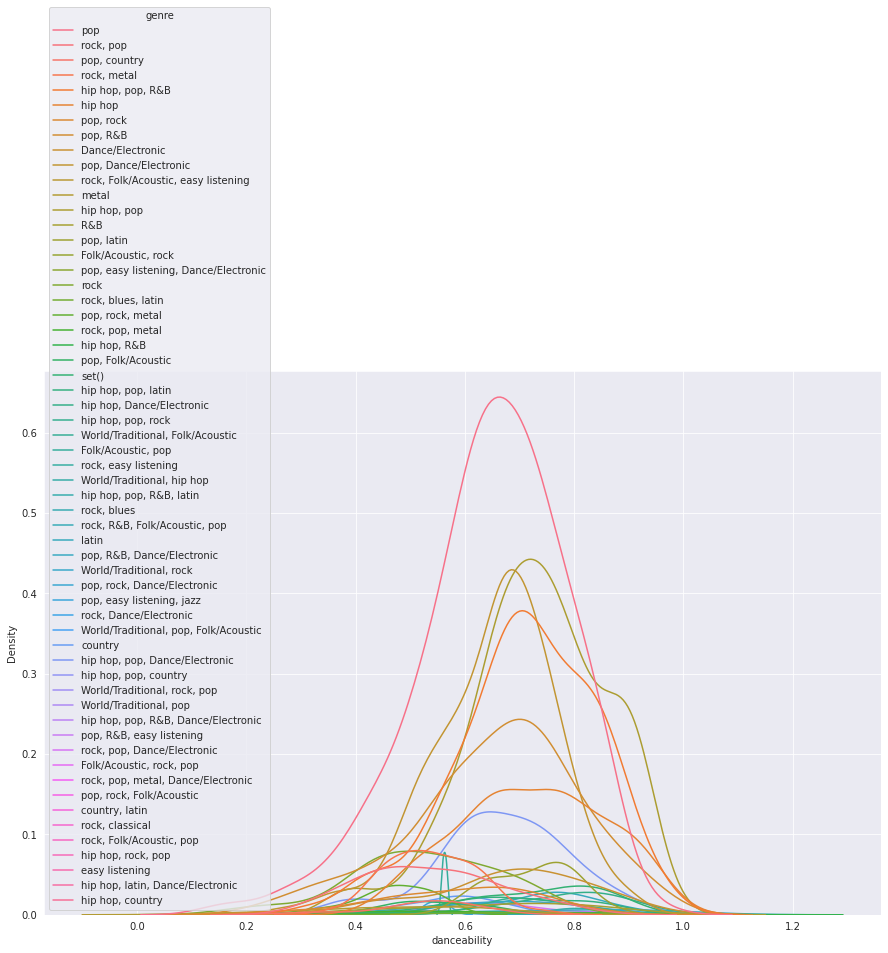

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.kdeplot(df["danceability"],hue=df["genre"],warn_singular=False)

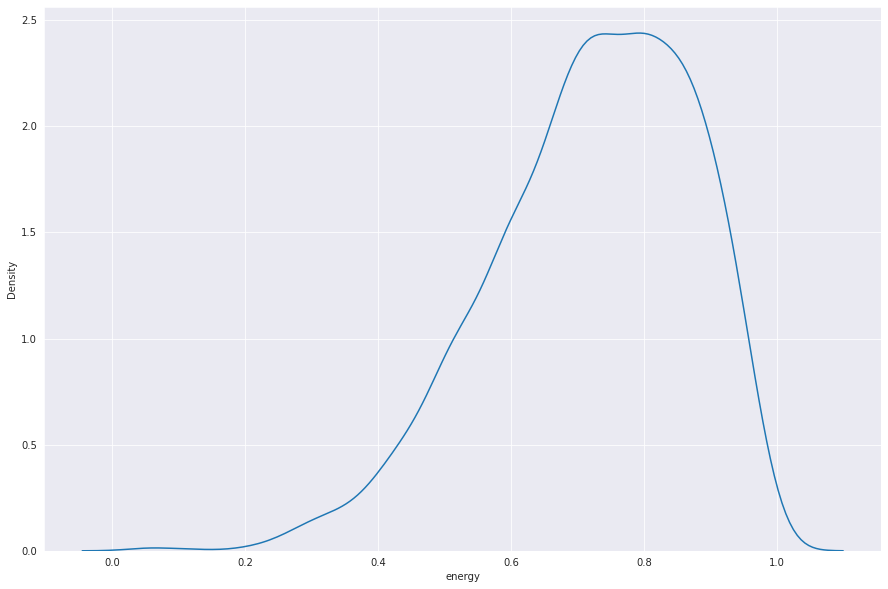

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.kdeplot(df["energy"],warn_singular=False)

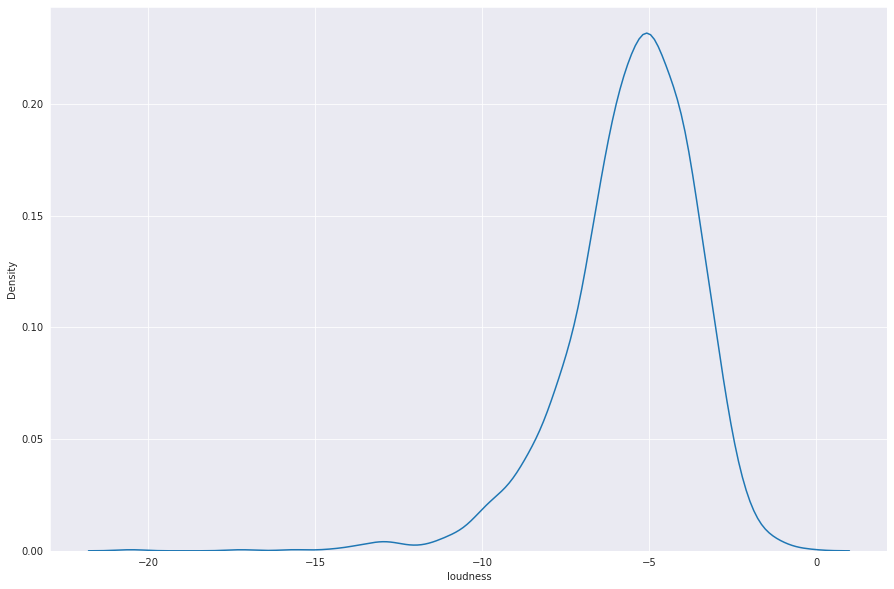

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.kdeplot(df["loudness"],warn_singular=False)

# POSITIVE RELATION SHIP BETWEEN  ENERGY AND LOUDNESS

In [ ]:
rel_energy_lou=df[["energy","loudness"]]

In [ ]:
rel_energy_lou

,energy,loudness
0,0.834,-5.444
1,0.897,-4.918
2,0.496,-9.007
3,0.913,-4.063
4,0.928,-4.806
...,...,...
1995,0.734,-5.065
1996,0.702,-5.707
1997,0.678,-8.635
1998,0.520,-7.513


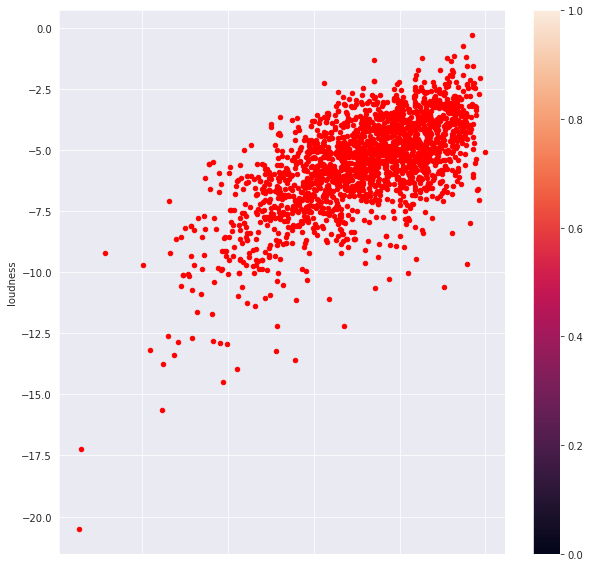

In [ ]:
rel_energy_lou.plot(x="energy",y="loudness",kind="scatter",figsize=(10,10),colorbar=True,color="r")

# RELATION BETWEEN LOUDNESS AND POPULARITY

In [ ]:
rel_pop=df[["loudness","popularity"]]

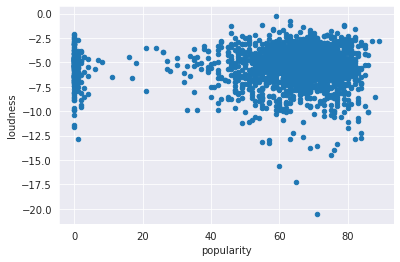

In [ ]:
rel_pop.plot(x="popularity",y="loudness",kind="scatter")

In [ ]:
# NEGATIVE CORELATION

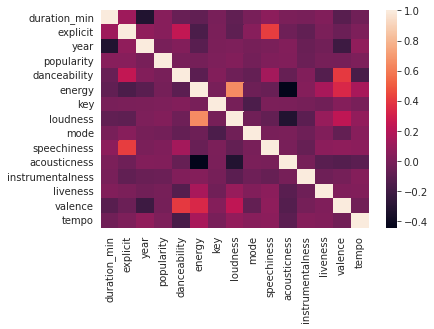

In [ ]:
sns.heatmap(df.corr(),annot=False)

In [ ]:
df.corr()

,duration_min,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_min,1.000000,0.123595,-0.316534,0.050617,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
explicit,0.123595,1.000000,0.078477,0.046605,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221
year,-0.316534,0.078477,1.000000,-0.003825,0.033532,-0.108644,0.007380,0.017479,-0.007358,0.001111,0.033809,-0.050265,-0.027037,-0.209365,0.076867
popularity,0.050617,0.046605,-0.003825,1.000000,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
danceability,-0.060057,0.248845,0.033532,-0.003546,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.162462,-0.108644,-0.014021,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.003320,0.007380,0.014823,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,-0.089829,0.017479,0.030632,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.417343,0.001111,0.021162,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747
